In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
img = cv2.imread("Original.tif",cv2.IMREAD_GRAYSCALE)


In [29]:
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
t_lo = 136
t_hi = 224

#blured = cv2.pyrMeanShiftFiltering(img, 3, 9)
blured = cv2.bilateralFilter(img, 9, 32, 72)

clahe = cv2.createCLAHE(clipLimit=129.0, tileGridSize=(64, 64))
cl1 = clahe.apply(blured)
cl1 = 255 - cl1

ret, thresh_hi = cv2.threshold(cl1, t_hi, 255, cv2.THRESH_TOZERO)
ret, thresh_lo = cv2.threshold(cl1, t_lo, 255, cv2.THRESH_TOZERO)

In [30]:
current = np.copy(thresh_hi)
prev = np.copy(current)
prev[:] = 0
current = cv2.morphologyEx(current, cv2.MORPH_OPEN, kernel5)
iter_num = 0
max_iter = 1000

In [31]:
while np.sum(current - prev) > 0 and iter_num < max_iter:
    iter_num = iter_num+1
    prev = np.copy(current)
    current = cv2.dilate(current, kernel3)
    current[np.where(thresh_lo == 0)] = 0


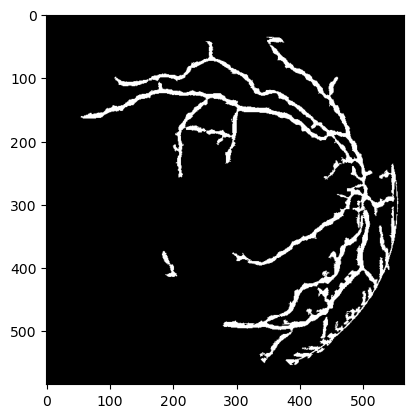

In [32]:
plt.imshow(current,cmap='gray')

In [26]:
contours, hierarchy = cv2.findContours(current, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    area = cv2.contourArea(contour)
    if area < 256:
        cv2.drawContours( current, [contour], 0, [0,0,0], -1 )

In [27]:
opening = cv2.morphologyEx(current, cv2.MORPH_OPEN, kernel7)   
cl1[np.where(opening == 0)] = 0

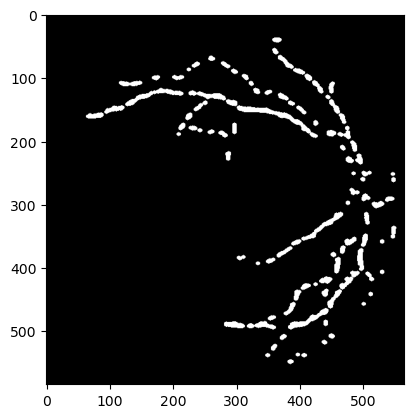

In [28]:
plt.imshow(opening,cmap='gray')